In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [39]:
def plotclock(ax, pos, phi=0, n=3, r=1, drawphi=False, name=None):
    ax.add_artist(plt.Circle(pos, r, fill=False, edgecolor='gray', clip_on=False))
    z=r*np.exp(1j*(phi+2*np.pi*np.arange(n)/n))
    x=pos[0]+np.real(z)
    y=pos[1]+np.imag(z)
    ax.plot([pos[0]-r, pos[0]+r], [pos[1]]*2, color='gray', clip_on=False)
    for i in range(len(z)):
        label=r'$\omega^%d$' %i
        if i==0: label='1'
        if i==1: label=r'$\omega$'
        ax.plot([x[i]]*2, [pos[1], y[i]], color='gray', linestyle='dashed', clip_on=False)
        ax.text(pos[0]+np.real(z)[i]*1.3,pos[1]+np.imag(z)[i]*1.3-0.05, label, \
                horizontalalignment='center', verticalalignment='center', fontsize=20, color='k')
    if drawphi:
        ax.plot([pos[0], x[0]], [pos[1], y[0]], color='gray', clip_on=False)
        ax.text(pos[0]+0.5, pos[1], r'$\varphi$', fontsize=20)
    if label:
        ax.text(pos[0], pos[1]-r-1, name, horizontalalignment='center', verticalalignment='center', fontsize=20)
        
    ax.scatter(x,y, s=25, color='C0', clip_on=False)

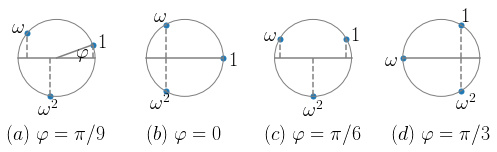

In [44]:
fig, ax = plt.subplots(figsize=(6.5,5))
ax.set_aspect('equal')

phis=[np.pi/9, 0, np.pi/6, np.pi/3]
draw=[True, False, False, False]
labels=[r'$(a)\; \varphi=\pi/9$', r'$(b)\; \varphi=0$', r'$(c)\; \varphi=\pi/6$', r'$(d)\; \varphi=\pi/3$']
x=np.linspace(0,10,4)

for i in range(4):
    plotclock(ax, [x[i],0], phi=phis[i], drawphi=draw[i], name=labels[i])
ax.set_ylim(-1.1,1.1)
ax.set_xlim(-0.5,10.5)
plt.axis('off')
plt.tight_layout()
plt.savefig('chirality.pdf', bbox_inches='tight', pad_inches=0)
plt.show()